# Kernel PCA

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/csizsek/venv/ve27/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed i

### Generate the Sample Data

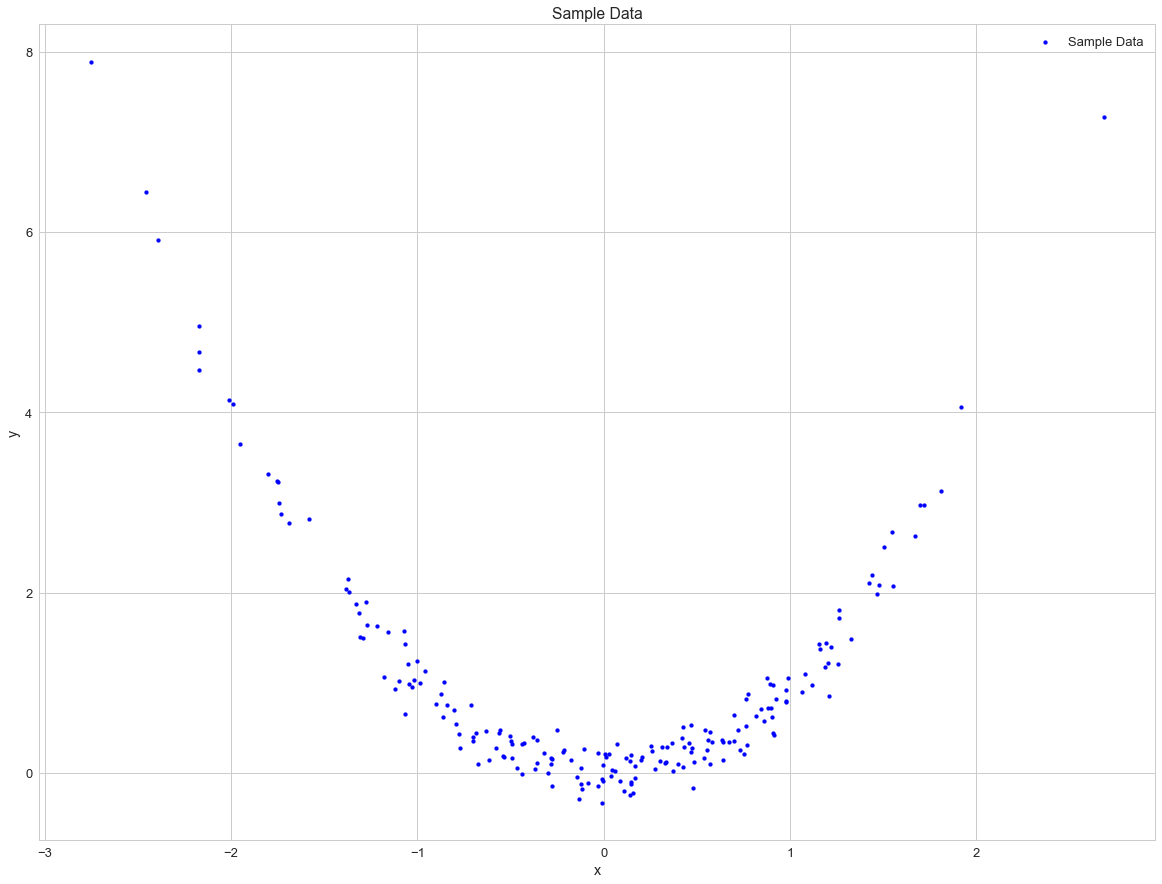

In [2]:
n_samples = 200
d = pd.DataFrame(pd.DataFrame({'x': np.random.randn(n_samples)}))
d['y'] = d.x**2 + np.random.randn(n_samples) * 0.2

_ = plt.figure(figsize=fsize)
_ = plt.scatter(d.x, d.y, color='b', marker='o', s=dotsize, label='Sample Data')
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('Sample Data')
_ = plt.legend(loc='upper right')

### Kernel PCA

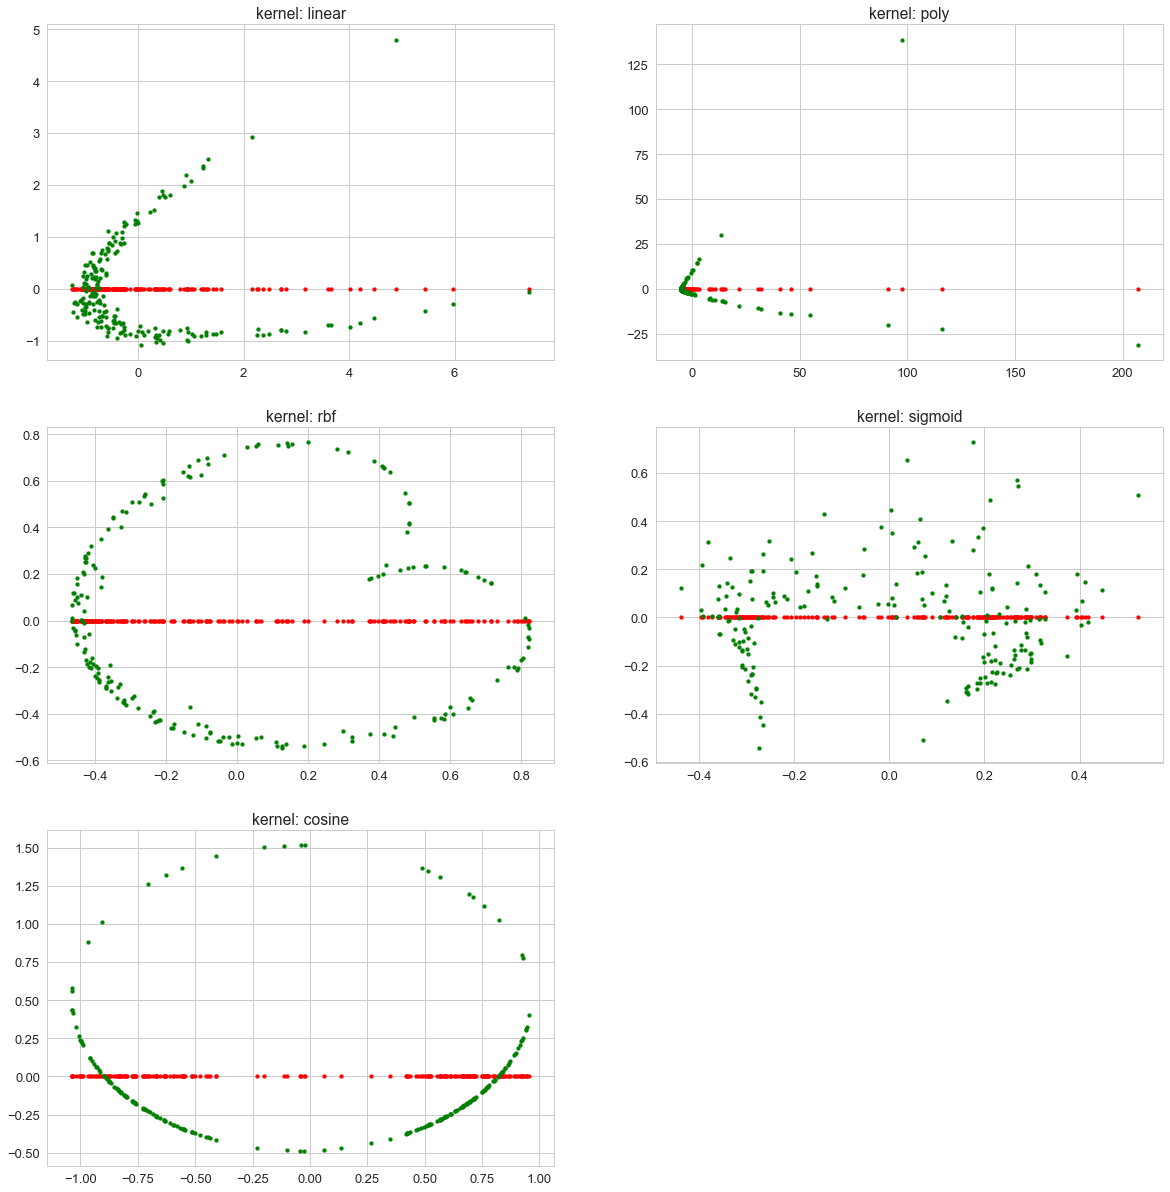

In [3]:
kernels = [
    'linear',
    'poly',
    'rbf',
    'sigmoid',
    'cosine']

_ = plt.figure(figsize=(20, 21))

for i in range(len(kernels)):

    pca = sklearn.decomposition.KernelPCA(2, kernel=kernels[i])
    pca.fit(d)
    d_pca = pd.DataFrame(pca.transform(d))
    d_pca.columns = ['pc_1', 'pc_2']
    
    ax = plt.subplot(3, 2, i + 1)
    _ = plt.scatter(d_pca.pc_1, [0] * len(d_pca), color='r', marker='o', s=dotsize)
    _ = plt.scatter(d_pca.pc_1, d_pca.pc_2, color='g', marker='o', s=dotsize)
    _ = plt.title('kernel: {0}'.format(kernels[i]))